In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns

In [2]:
data_df = pd.read_pickle('/home/benjamin/code/Benjaminbhk/on_the_list_crm/on_the_list_crm/data/segmentation_all_df_07_01_2022_2.pkl')
seg_df = pd.read_pickle('/home/benjamin/code/Benjaminbhk/on_the_list_crm/on_the_list_crm/data/segmentation_07_01_2022.pkl')
data_df_cust = data_df.drop_duplicates(subset=['customer_ID'], keep='last')
spend_per_purchase = pd.read_pickle('/home/benjamin/code/Benjaminbhk/on_the_list_crm/on_the_list_crm/data/spend_per_purchase.pkl')
nb_of_itm_per_purchase = pd.read_pickle('/home/benjamin/code/Benjaminbhk/on_the_list_crm/on_the_list_crm/data/nb_of_itm.pkl')

In [18]:
round(data_df.drop_duplicates(subset=['date','customer_ID'], keep='last').groupby('customer_ID')[['date']].agg('count').reset_index()['date'].mean(),2)

3.83

In [7]:
data_df.shape

(831324, 17)

In [8]:
data_df.columns

Index(['order_ID', 'item_ID', 'date', 'item_price', 'item_quantity',
       'item_discount', 'final_price', 'customer_ID', 'gender', 'age',
       'nationality', 'premium_status', 'district', 'on_off', 'product_cat',
       'vendor_cat', 'segmentation'],
      dtype='object')

In [6]:
seg_df.shape

(64688, 2)

In [7]:
seg_df.columns

Index(['customer_ID', 'customer_segmentation'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

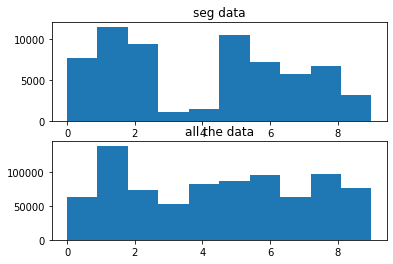

In [28]:
plt.subplot(2, 1, 1)
plt.hist(seg_df['customer_segmentation'])
plt.title("seg data")
plt.subplot(2, 1, 2)
plt.hist(data_df['segmentation'])
plt.title("all the data")
plt.show

In [20]:
seg_0_df = seg_df[seg_df['customer_segmentation'] == 0]
seg_1_df = seg_df[seg_df['customer_segmentation'] == 1]
seg_2_df = seg_df[seg_df['customer_segmentation'] == 2]
seg_3_df = seg_df[seg_df['customer_segmentation'] == 3]
seg_4_df = seg_df[seg_df['customer_segmentation'] == 4]
seg_5_df = seg_df[seg_df['customer_segmentation'] == 5]
seg_6_df = seg_df[seg_df['customer_segmentation'] == 6]
seg_7_df = seg_df[seg_df['customer_segmentation'] == 7]
seg_8_df = seg_df[seg_df['customer_segmentation'] == 8]
seg_9_df = seg_df[seg_df['customer_segmentation'] == 9]

## All Seg

### General informations

In [10]:
print(f"total unique customer : {len(data_df['customer_ID'].unique().tolist())}")

total unique customer : 64688


<function matplotlib.pyplot.show(close=None, block=None)>

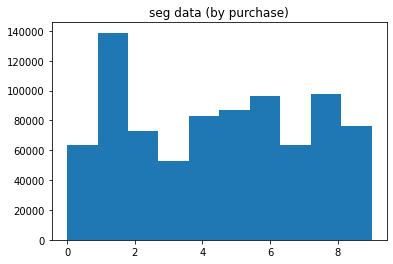

In [11]:
plt.hist(data_df['segmentation'])
plt.title("seg data (by purchase)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

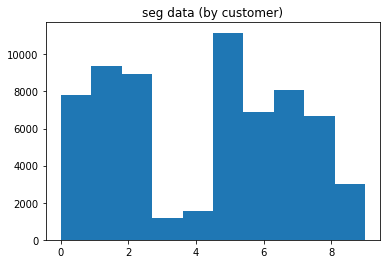

In [12]:
plt.hist(data_df_cust['segmentation'])
plt.title("seg data (by customer)")
plt.show

### General graph

<function matplotlib.pyplot.show(close=None, block=None)>

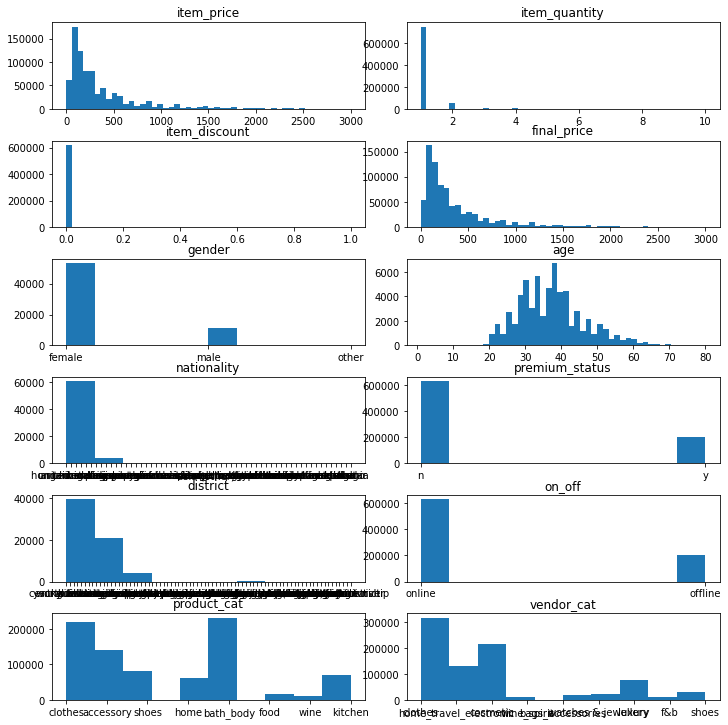

In [58]:
#define subplots
fig, ax = plt.subplots(6, 2, figsize=(10,10))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_df['item_price'],bins = 50,range=(1,3000))
ax[0, 0].title.set_text('item_price')

ax[0, 1].hist(data_df['item_quantity'],bins = 50,range=(1,10))
ax[0, 1].title.set_text('item_quantity')

ax[1, 0].hist(data_df['item_discount'],bins = 50,range=(0,1))
ax[1, 0].title.set_text('item_discount')

ax[1, 1].hist(data_df['final_price'],bins = 50,range=(1,3000))
ax[1, 1].title.set_text('final_price')

ax[2, 0].hist(data_df_cust['gender'])
ax[2, 0].title.set_text('gender')

ax[2, 1].hist(data_df_cust['age'],bins = 50,range=(1,80))
ax[2, 1].title.set_text('age')

ax[3, 0].hist(data_df_cust['nationality'])
ax[3, 0].title.set_text('nationality')

ax[3, 1].hist(data_df['premium_status'])
ax[3, 1].title.set_text('premium_status')

ax[4, 0].hist(data_df_cust['district'])
ax[4, 0].title.set_text('district')

ax[4, 1].hist(data_df['on_off'])
ax[4, 1].title.set_text('on_off')

ax[5, 0].hist(data_df['product_cat'])
ax[5, 0].title.set_text('product_cat')


ax[5, 1].hist(data_df['vendor_cat'])
ax[5, 1].title.set_text('vendor_cat')


plt.show

### Stats numerical features 
(item_price,item_quantity,item_discount,final_price,age)

In [51]:
print ('-----item_price-----')
print ('all data')
print (f"M : {round(data_df['item_price'].mean(),2)}, Q1 : {data_df['item_price'].quantile(.25)}, Q2 : {data_df['item_price'].quantile(.5)}, Q3 :{data_df['item_price'].quantile(.75)}, IR : {data_df['item_price'].quantile(.75)-data_df['item_price'].quantile(.25)}")
print ('')
print ('-----item_quantity-----')
print ('all data')
print (f"M : {round(data_df['item_quantity'].mean(),2)}, Q1 : {data_df['item_quantity'].quantile(.25)}, Q2 : {data_df['item_quantity'].quantile(.5)}, Q3 :{data_df['item_quantity'].quantile(.75)}, IR : {data_df['item_quantity'].quantile(.75)-data_df['item_quantity'].quantile(.25)}")
print ('')
print ('-----item_discount-----')
print ('all data')
print (f"M : {round(data_df['item_discount'].mean(),2)}, Q1 : {data_df['item_discount'].quantile(.25)}, Q2 : {data_df['item_discount'].quantile(.5)}, Q3 :{data_df['item_discount'].quantile(.75)}, IR : {data_df['item_discount'].quantile(.75)-data_df['item_discount'].quantile(.25)}")
print ('')
print ('-----final_price-----')
print ('all data')
print (f"M : {round(data_df['final_price'].mean(),2)}, Q1 : {data_df['final_price'].quantile(.25)} ,  Q2 : {data_df['final_price'].quantile(.5)}, Q3 :{data_df['final_price'].quantile(.75)}, IR : {data_df['final_price'].quantile(.75)-data_df['final_price'].quantile(.25)}")
print ('')
print ('-----age-----')
print ('all data')
print (f"M : {round(data_df_cust['age'].mean(),2)}, Q1 : {data_df['age'].quantile(.25)}, Q2 : {data_df['age'].quantile(.5)}, Q3 :{data_df['age'].quantile(.75)}, IR : {data_df['age'].quantile(.75)-data_df['age'].quantile(.25)}")

-----item_price-----
all data
M : 433.63, Q1 : 111.0, Q2 : 210.0, Q3 :490.0, IR : 379.0

-----item_quantity-----
all data
M : 1.15, Q1 : 1.0, Q2 : 1.0, Q3 :1.0, IR : 0.0

-----item_discount-----
all data
M : 20.8, Q1 : 0.0, Q2 : 0.0, Q3 :3.0, IR : 3.0

-----final_price-----
all data
M : 436.59, Q1 : 119.0 ,  Q2 : 230.0, Q3 :480.0, IR : 361.0

-----age-----
all data
M : 37.39, Q1 : 33.0, Q2 : 38.0, Q3 :45.0, IR : 12.0


### Stats categorical features
gender, nationality, premium_status, district, on_off, product_cat, vendor_cat

In [53]:
print('-----gender-----')
print('--all data')
print(f"Women {round(data_df_cust[data_df_cust['gender']=='female']['gender'].count()/data_df_cust['gender'].count()*100,2)}%")
print(f"Men {round(data_df_cust[data_df_cust['gender']=='male']['gender'].count()/data_df_cust['gender'].count()*100,2)}%")
print("")
print('-----nationality-----')
print('--all data')
for country in data_df_cust['nationality'].unique():
    count=data_df_cust[data_df_cust['nationality'] == country]['nationality'].count()
    if count/len(data_df_cust)*100 > 1.5:
        print(f'{country} : {round(    count   /   len(data_df_cust)  *  100     ,2)}%')
print("")
print('-----premium_status-----')
print('--all data')
print(f"premium {round(data_df_cust[data_df_cust['premium_status']=='y']['premium_status'].count()/data_df_cust['premium_status'].count()*100,2)}%")
print(f"non-premium {round(data_df_cust[data_df_cust['premium_status']=='n']['premium_status'].count()/data_df_cust['premium_status'].count()*100,2)}%")
print("")
print('-----district-----')
print('--all data')
for district in data_df_cust['district'].unique():
    count=data_df_cust[data_df_cust['district'] == district]['district'].count()
    if count/len(data_df_cust)*100 > 5:
        print(f'{district} : {round(    count   /   len(data_df_cust)  *  100     ,2)}%')
print("")
print('-----on_off-----')
print('--all data')
print(f"online {round(data_df[data_df['on_off']=='online']['on_off'].count()/data_df['on_off'].count()*100,2)}%")
print(f"offline {round(data_df[data_df['on_off']=='offline']['on_off'].count()/data_df['on_off'].count()*100,2)}%")
print("")
print('-----product_cat-----')
print('--all data')
for product_cat in data_df['product_cat'].unique():
    count=data_df[data_df['product_cat'] == product_cat]['product_cat'].count()
    if count/len(data_df)*100 > 10:
        print(f'{product_cat} : {round(    count   /   len(data_df)  *  100     ,2)}%')
print("")
print('-----vendor_cat-----')
print('--all data')
for vendor_cat in data_df['vendor_cat'].unique():
    count=data_df[data_df['vendor_cat'] == vendor_cat]['vendor_cat'].count()
    if count/len(data_df)*100 > 10:
        print(f'{vendor_cat} : {round(    count   /   len(data_df)  *  100     ,2)}%')

-----gender-----
--all data
Women 82.73%
Men 17.26%

-----nationality-----
--all data
hong kong sar : 87.4%
china : 3.09%
united kingdom : 1.57%
other : 2.84%

-----premium_status-----
--all data
premium 5.87%
non-premium 94.13%

-----district-----
--all data
central & western : 31.8%
sha tin : 5.69%
kowloon city : 5.34%
eastern : 9.16%
wan chai : 5.72%

-----on_off-----
--all data
online 75.54%
offline 24.46%

-----product_cat-----
--all data
clothes : 26.27%
accessory : 16.78%
bath_body : 27.87%

-----vendor_cat-----
--all data
clothes : 38.06%
home_travel_electronic : 15.55%
cosmetic : 25.83%


### Stats spending

<function matplotlib.pyplot.show(close=None, block=None)>

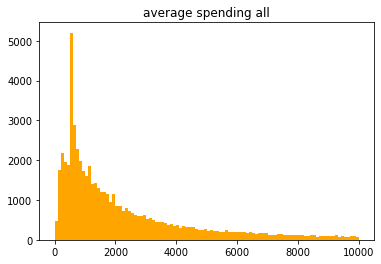

In [11]:
table = pd.pivot_table(data_0_df, values='final_price', index=['customer_ID'], aggfunc=np.sum)
table_all = pd.pivot_table(data_df, values='final_price', index=['customer_ID'], aggfunc=np.sum)

# fig, ax = plt.subplots(1, 2, figsize=(7,3))
# fig.tight_layout()

plt.hist(table_all['final_price'],bins=100,range=(1,10000),color='orange')
plt.title('average spending all')
#create subplots
# ax[0, 0].hist(table['final_price'],bins=100,range=(1,50000))
# ax[0, 0].title.set_text('average spending per customer overall')
# ax[0, 1].hist(table_all['final_price'],bins=100,range=(1,50000))
plt.show

In [14]:
spend_per_purchase.columns

Index(['customer_ID', 'money_spend'], dtype='object')

In [19]:
data=data_df.groupby('product_cat')[['final_price']].agg('count')
data

,final_price
product_cat,
accessory,139533
bath_body,231685
clothes,218391
food,15495
home,62552
kitchen,70222
shoes,82092
wine,11354


In [12]:
print('-----average spending per item-----')
print('--all data')
print(f"{round(data_df['final_price'].mean(),2)} HKS")
print("")

print('-----average spending per purchase-----')
print('--all data')
print(f"{round(spend_per_purchase['money_spend'].mean(),2)} HKS")
print("")

print('-----average item per purchase-----')
print('--all data')
print(f"{round(nb_of_itm_per_purchase['money_spend'].mean(),2)}")
print("")

print('-----average spending per customer overall-----')
print ('all data')
print (f"M : {round(table_all['final_price'].mean(),2)}, Q1 : {table_all['final_price'].quantile(.25)}, Q2 : {table_all['final_price'].quantile(.5)}, Q3 :{table_all['final_price'].quantile(.75)}, IR : {table_all['final_price'].quantile(.75)-table_all['final_price'].quantile(.25)}")
print ('')

-----average spending per item-----
--all data
436.59 HKS

-----average spending per purchase-----
--all data
1353.92 HKS

-----average item per purchase-----
--all data
3.1

-----average spending per customer overall-----
all data
M : 5610.7, Q1 : 700.0, Q2 : 1700.8, Q3 :4430.45, IR : 3730.45



In [75]:
list_cust = []
list_numb_itm = []
df = pd.DataFrame()
for group in data_df['order_ID'].unique().tolist():
    tmp = data_df[data_df['order_ID'] == group]
    for customer in tmp['customer_ID'].unique().tolist():
        tmp_2 = tmp[tmp['customer_ID'] == customer]
        count = tmp_2['final_price'].count()
        list_cust.append(customer)
        list_numb_itm.append(count)
df['customer_ID']=list_cust
df['money_spend']=list_numb_itm
df

,customer_ID,money_spend
0,b3dcd3a965e671340a3833eeceda8b94,5
1,2ec08f4fe6864f6705fce8f2c29e1d29,2
2,f17115c651b4f972aa6e27c11a353e99,3
3,cfcc782e6ddda071c26b9fbe12d76319,5
4,36577ff8954cde8c37fc8fe775cb2102,3
...,...,...
268065,29d2cde3e8fe55c392477d96854e8b8b,8
268066,9f4ab3e8dd51c976c4084dfcdf87dfb6,1
268067,f1464a5f25209d568607736e1c0913ff,3
268068,0287469751685b80e1e390dd77d7740c,5


In [79]:
# df.to_pickle('/home/benjamin/code/Benjaminbhk/on_the_list_crm/notebooks/spend_per_purchase.pkl')
df.to_pickle('/home/benjamin/code/Benjaminbhk/on_the_list_crm/notebooks/nb_of_itm.pkl')

### Segmentation fidelity and weight

### Segment comparison information

## Seg 0

### General data

In [20]:
seg_0_list = seg_0_df['customer_ID'].unique().tolist()
len(seg_0_list)

7690

In [19]:
data_0_df = data_df[data_df['customer_ID'].isin(seg_0_list)]
data_0_df_cust = data_0_df.drop_duplicates(subset=['customer_ID'], keep='last')
data_0_df_cust.shape

(7690, 24)

<function matplotlib.pyplot.show(close=None, block=None)>

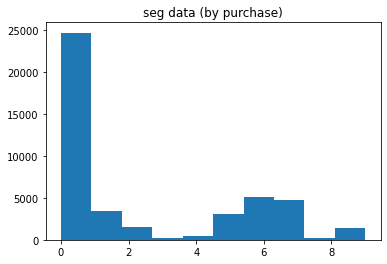

In [16]:
plt.hist(data_0_df['segmentation'])
plt.title("seg data (by purchase)")
plt.show

### General graph

<function matplotlib.pyplot.show(close=None, block=None)>

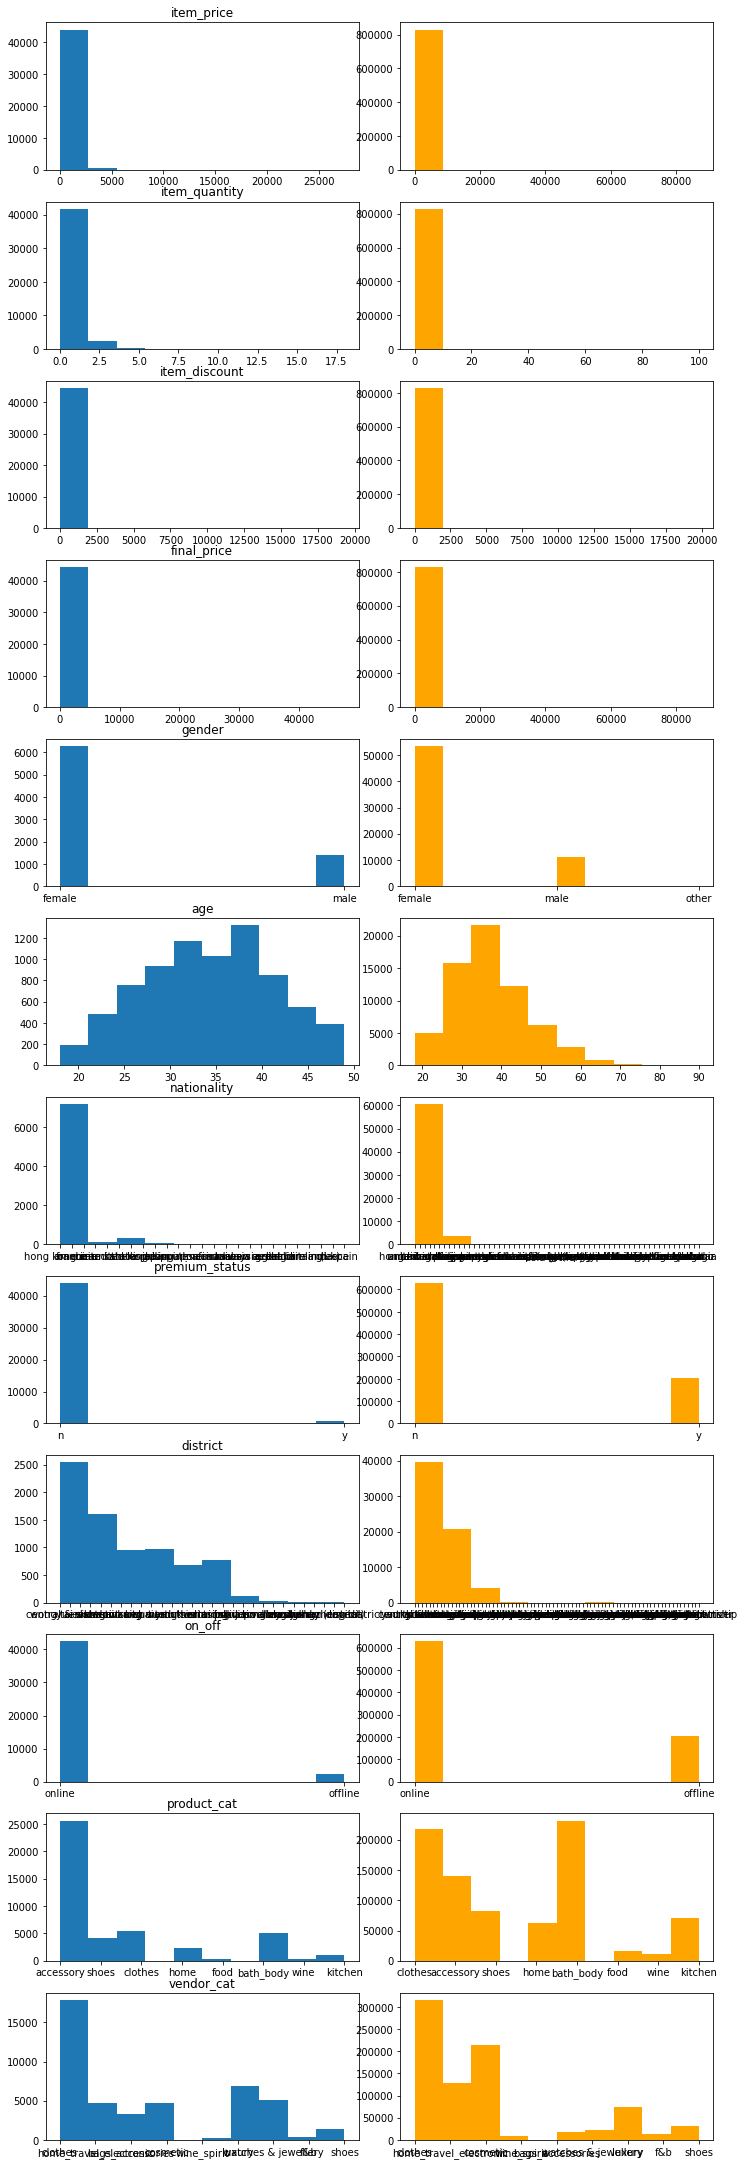

In [22]:
#define subplots
fig, ax = plt.subplots(12, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_0_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_0_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_0_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_0_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_0_df_cust['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df_cust['gender'],color='orange')

ax[5, 0].hist(data_0_df_cust['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df_cust['age'],color='orange')

ax[6, 0].hist(data_0_df_cust['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df_cust['nationality'],color='orange')

ax[7, 0].hist(data_0_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_0_df_cust['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df_cust['district'],color='orange')

ax[9, 0].hist(data_0_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_0_df['product_cat'])
ax[10, 0].title.set_text('product_cat')
ax[10, 1].hist(data_df['product_cat'],color='orange')

ax[11, 0].hist(data_0_df['vendor_cat'])
ax[11, 0].title.set_text('vendor_cat')
ax[11, 1].hist(data_df['vendor_cat'],color='orange')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

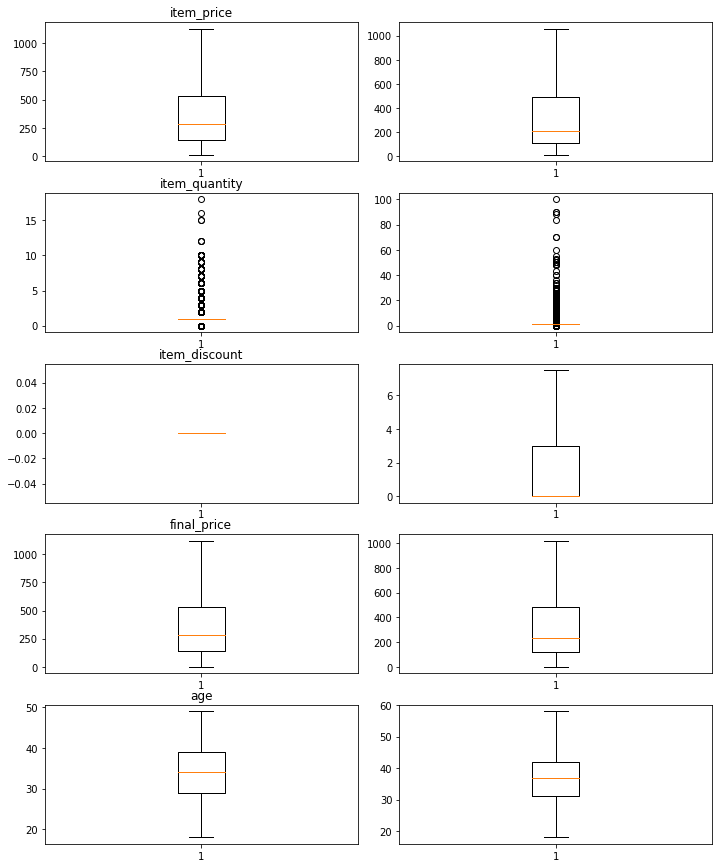

In [23]:
#define subplots
fig, ax = plt.subplots(5, 2, figsize=(10,12))
fig.tight_layout()

#create subplots
ax[0, 0].boxplot(data_0_df['item_price'],showfliers=False)
ax[0, 0].title.set_text('item_price')
ax[0, 1].boxplot(data_df['item_price'],showfliers=False)

ax[1, 0].boxplot(data_0_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].boxplot(data_df['item_quantity'])

ax[2, 0].boxplot(data_0_df['item_discount'],showfliers=False)
ax[2, 0].title.set_text('item_discount')
ax[2, 1].boxplot(data_df['item_discount'],showfliers=False)

ax[3, 0].boxplot(data_0_df['final_price'],showfliers=False)
ax[3, 0].title.set_text('final_price')
ax[3, 1].boxplot(data_df['final_price'],showfliers=False)

ax[4, 0].boxplot(data_0_df_cust['age'],showfliers=False)
ax[4, 0].title.set_text('age')
ax[4, 1].boxplot(data_df_cust['age'],showfliers=False)

plt.show

### Stats numerical features 
(item_price,item_quantity,item_discount,final_price,age)

In [24]:
print ('-----item_price-----')
print ('Seg 0')
print (f"M : {round(data_0_df['item_price'].mean(),2)}, Q1 : {data_0_df['item_price'].quantile(.25)}, Q2 : {data_0_df['item_price'].quantile(.5)}, Q3 :{data_0_df['item_price'].quantile(.75)}, IR : {data_0_df['item_price'].quantile(.75)-data_0_df['item_price'].quantile(.25)}")
print ('all data')
print (f"M : {round(data_df['item_price'].mean(),2)}, Q1 : {data_df['item_price'].quantile(.25)}, Q2 : {data_df['item_price'].quantile(.5)}, Q3 :{data_df['item_price'].quantile(.75)}, IR : {data_df['item_price'].quantile(.75)-data_df['item_price'].quantile(.25)}")
print ('')
print ('-----item_quantity-----')
print ('Seg 0')
print (f"M : {round(data_0_df['item_quantity'].mean(),2)}, Q1 : {data_0_df['item_quantity'].quantile(.25)}, Q2 : {data_0_df['item_quantity'].quantile(.5)}, Q3 :{data_0_df['item_quantity'].quantile(.75)}, IR : {data_0_df['item_quantity'].quantile(.75)-data_0_df['item_quantity'].quantile(.25)}")
print ('all data')
print (f"M : {round(data_df['item_quantity'].mean(),2)}, Q1 : {data_df['item_quantity'].quantile(.25)}, Q2 : {data_df['item_quantity'].quantile(.5)}, Q3 :{data_df['item_quantity'].quantile(.75)}, IR : {data_df['item_quantity'].quantile(.75)-data_df['item_quantity'].quantile(.25)}")
print ('')
print ('-----item_discount-----')
print ('Seg 0')
print (f"M : {round(data_0_df['item_discount'].mean(),2)}, Q1 : {data_0_df['item_discount'].quantile(.25)}, Q2 : {data_0_df['item_discount'].quantile(.5)}, Q3 :{data_0_df['item_discount'].quantile(.75)}, IR : {data_0_df['item_discount'].quantile(.75)-data_0_df['item_discount'].quantile(.25)}")
print ('all data')
print (f"M : {round(data_df['item_discount'].mean(),2)}, Q1 : {data_df['item_discount'].quantile(.25)}, Q2 : {data_df['item_discount'].quantile(.5)}, Q3 :{data_df['item_discount'].quantile(.75)}, IR : {data_df['item_discount'].quantile(.75)-data_df['item_discount'].quantile(.25)}")
print ('')
print ('-----final_price-----')
print ('Seg 0')
print (f"M : {round(data_0_df['final_price'].mean(),2)}, Q1 : {data_0_df['final_price'].quantile(.25)} ,  Q2 : {data_0_df['final_price'].quantile(.5)}, Q3 :{data_0_df['final_price'].quantile(.75)}, IR : {data_0_df['final_price'].quantile(.75)-data_0_df['final_price'].quantile(.25)}")
print ('all data')
print (f"M : {round(data_df['final_price'].mean(),2)}, Q1 : {data_df['final_price'].quantile(.25)} ,  Q2 : {data_df['final_price'].quantile(.5)}, Q3 :{data_df['final_price'].quantile(.75)}, IR : {data_df['final_price'].quantile(.75)-data_df['final_price'].quantile(.25)}")
print ('')
print ('-----age-----')
print ('Seg 0')
print (f"M : {round(data_0_df_cust['age'].mean(),2)}, Q1 : {data_0_df['age'].quantile(.25)}, Q2 : {data_0_df['age'].quantile(.5)}, Q3 :{data_0_df['age'].quantile(.75)}, IR : {data_0_df['age'].quantile(.75)-data_0_df['age'].quantile(.25)}")
print ('all data')
print (f"M : {round(data_df_cust['age'].mean(),2)}, Q1 : {data_df['age'].quantile(.25)}, Q2 : {data_df['age'].quantile(.5)}, Q3 :{data_df['age'].quantile(.75)}, IR : {data_df['age'].quantile(.75)-data_df['age'].quantile(.25)}")

-----item_price-----
Seg 0
M : 482.36, Q1 : 138.0, Q2 : 288.0, Q3 :536.0, IR : 398.0
all data
M : 433.63, Q1 : 111.0, Q2 : 210.0, Q3 :490.0, IR : 379.0

-----item_quantity-----
Seg 0
M : 1.09, Q1 : 1.0, Q2 : 1.0, Q3 :1.0, IR : 0.0
all data
M : 1.15, Q1 : 1.0, Q2 : 1.0, Q3 :1.0, IR : 0.0

-----item_discount-----
Seg 0
M : 17.3, Q1 : 0.0, Q2 : 0.0, Q3 :0.0, IR : 0.0
all data
M : 20.8, Q1 : 0.0, Q2 : 0.0, Q3 :3.0, IR : 3.0

-----final_price-----
Seg 0
M : 485.4, Q1 : 140.0 ,  Q2 : 285.6, Q3 :532.0, IR : 392.0
all data
M : 436.59, Q1 : 119.0 ,  Q2 : 230.0, Q3 :480.0, IR : 361.0

-----age-----
Seg 0
M : 34.25, Q1 : 31.0, Q2 : 37.0, Q3 :41.0, IR : 10.0
all data
M : 37.39, Q1 : 33.0, Q2 : 38.0, Q3 :45.0, IR : 12.0


### Stats categorical features
gender, nationality, premium_status, district, on_off, product_cat, vendor_cat

In [25]:
print('-----gender-----')
print('--Seg 0')
print(f"Women {round(data_0_df_cust[data_0_df_cust['gender']=='female']['gender'].count()/data_0_df_cust['gender'].count()*100,2)}%")
print(f"Men {round(data_0_df_cust[data_0_df_cust['gender']=='male']['gender'].count()/data_0_df_cust['gender'].count()*100,2)}%")
print('--all data')
print(f"Women {round(data_df_cust[data_df_cust['gender']=='female']['gender'].count()/data_df_cust['gender'].count()*100,2)}%")
print(f"Men {round(data_df_cust[data_df_cust['gender']=='male']['gender'].count()/data_df_cust['gender'].count()*100,2)}%")
print("")
print('-----nationality-----')
print('--Seg 0')
for country in data_0_df_cust['nationality'].unique():
    count=data_0_df_cust[data_0_df_cust['nationality'] == country]['nationality'].count()
    if count/len(data_0_df_cust)*100 > 1.5:
        print(f'{country} : {round(    count   /   len(data_0_df_cust)  *  100     ,2)}%')
print('--all data')
for country in data_df_cust['nationality'].unique():
    count=data_df_cust[data_df_cust['nationality'] == country]['nationality'].count()
    if count/len(data_df_cust)*100 > 1.5:
        print(f'{country} : {round(    count   /   len(data_df_cust)  *  100     ,2)}%')
print("")
print('-----premium_status-----')
print('--Seg 0')
print(f"premium {round(data_0_df_cust[data_0_df_cust['premium_status']=='y']['premium_status'].count()/data_0_df_cust['premium_status'].count()*100,2)}%")
print(f"non-premium {round(data_0_df_cust[data_0_df_cust['premium_status']=='n']['premium_status'].count()/data_0_df_cust['premium_status'].count()*100,2)}%")
print('--all data')
print(f"premium {round(data_df_cust[data_df_cust['premium_status']=='y']['premium_status'].count()/data_df_cust['premium_status'].count()*100,2)}%")
print(f"non-premium {round(data_df_cust[data_df_cust['premium_status']=='n']['premium_status'].count()/data_df_cust['premium_status'].count()*100,2)}%")
print("")
print('-----district-----')
print('--Seg 0')
for district in data_0_df_cust['district'].unique():
    count=data_0_df_cust[data_0_df_cust['district'] == district]['district'].count()
    if count/len(data_0_df_cust)*100 > 5:
        print(f'{district} : {round(    count   /   len(data_0_df_cust)  *  100     ,2)}%')
print('--all data')
for district in data_df_cust['district'].unique():
    count=data_df_cust[data_df_cust['district'] == district]['district'].count()
    if count/len(data_df_cust)*100 > 5:
        print(f'{district} : {round(    count   /   len(data_df_cust)  *  100     ,2)}%')
print("")
print('-----on_off-----')
print('--Seg 0')
print(f"online {round(data_0_df[data_0_df['on_off']=='online']['on_off'].count()/data_0_df['on_off'].count()*100,2)}%")
print(f"offline {round(data_0_df[data_0_df['on_off']=='offline']['on_off'].count()/data_0_df['on_off'].count()*100,2)}%")
print('--all data')
print(f"online {round(data_df[data_df['on_off']=='online']['on_off'].count()/data_df['on_off'].count()*100,2)}%")
print(f"offline {round(data_df[data_df['on_off']=='offline']['on_off'].count()/data_df['on_off'].count()*100,2)}%")
print("")
print('-----product_cat-----')
print('--Seg 0')
for product_cat in data_0_df['product_cat'].unique():
    count=data_0_df[data_0_df['product_cat'] == product_cat]['product_cat'].count()
    if count/len(data_0_df)*100 > 10:
        print(f'{product_cat} : {round(    count   /   len(data_0_df)  *  100     ,2)}%')
print('--all data')
for product_cat in data_df['product_cat'].unique():
    count=data_df[data_df['product_cat'] == product_cat]['product_cat'].count()
    if count/len(data_df)*100 > 10:
        print(f'{product_cat} : {round(    count   /   len(data_df)  *  100     ,2)}%')
print("")
print('-----vendor_cat-----')
print('--Seg 0')
for vendor_cat in data_0_df['vendor_cat'].unique():
    count=data_0_df[data_0_df['vendor_cat'] == vendor_cat]['vendor_cat'].count()
    if count/len(data_0_df)*100 > 10:
        print(f'{vendor_cat} : {round(    count   /   len(data_0_df)  *  100     ,2)}%')
print('--all data')
for vendor_cat in data_df['vendor_cat'].unique():
    count=data_df[data_df['vendor_cat'] == vendor_cat]['vendor_cat'].count()
    if count/len(data_df)*100 > 10:
        print(f'{vendor_cat} : {round(    count   /   len(data_df)  *  100     ,2)}%')


-----gender-----
--Seg 0
Women 81.72%
Men 18.28%
--all data
Women 82.73%
Men 17.26%

-----nationality-----
--Seg 0
hong kong sar : 90.1%
china : 2.64%
other : 2.12%
--all data
hong kong sar : 87.4%
china : 3.09%
united kingdom : 1.57%
other : 2.84%

-----premium_status-----
--Seg 0
premium 0.77%
non-premium 99.23%
--all data
premium 5.87%
non-premium 94.13%

-----district-----
--Seg 0
central & western : 24.86%
yuen long : 5.06%
eastern : 8.74%
sha tin : 6.79%
kowloon city : 5.33%
kwun tong : 6.67%
yau tsim mong : 5.08%
--all data
central & western : 31.8%
sha tin : 5.69%
kowloon city : 5.34%
eastern : 9.16%
wan chai : 5.72%

-----on_off-----
--Seg 0
online 95.07%
offline 4.93%
--all data
online 75.54%
offline 24.46%

-----product_cat-----
--Seg 0
accessory : 57.48%
clothes : 12.4%
bath_body : 11.49%
--all data
clothes : 26.27%
accessory : 16.78%
bath_body : 27.87%

-----vendor_cat-----
--Seg 0
clothes : 40.19%
home_travel_electronic : 10.64%
cosmetic : 10.54%
luxury : 15.37%
watches &

### Stats spending

<function matplotlib.pyplot.show(close=None, block=None)>

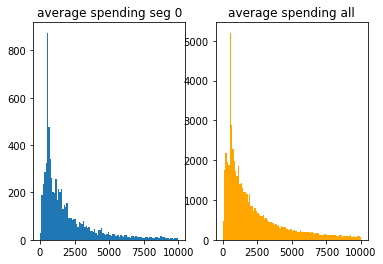

In [26]:
table = pd.pivot_table(data_0_df, values='final_price', index=['customer_ID'], aggfunc=np.sum)
table_all = pd.pivot_table(data_df, values='final_price', index=['customer_ID'], aggfunc=np.sum)

# fig, ax = plt.subplots(1, 2, figsize=(7,3))
# fig.tight_layout()
plt.subplot(121)
plt.hist(table['final_price'],bins=100,range=(1,10000))
plt.title('average spending seg 0')
plt.subplot(122)
plt.hist(table_all['final_price'],bins=100,range=(1,10000),color='orange')
plt.title('average spending all')
#create subplots
# ax[0, 0].hist(table['final_price'],bins=100,range=(1,50000))
# ax[0, 0].title.set_text('average spending per customer overall')
# ax[0, 1].hist(table_all['final_price'],bins=100,range=(1,50000))
plt.show

In [115]:
print('-----average spending per item-----')
print('--Seg 0')
print(f"{round(data_0_df['final_price'].mean(),2)} HKS")
print('--all data')
print(f"{round(data_df['final_price'].mean(),2)} HKS")
print("")
print('-----average spending per customer overall-----')
print ('Seg 0')
print (f"M : {round(table['final_price'].mean(),2)}, Q1 : {table['final_price'].quantile(.25)}, Q2 : {table['final_price'].quantile(.5)}, Q3 :{table['final_price'].quantile(.75)}, IR : {table['final_price'].quantile(.75)-table['final_price'].quantile(.25)}")
print ('all data')
print (f"M : {round(table_all['final_price'].mean(),2)}, Q1 : {table_all['final_price'].quantile(.25)}, Q2 : {table_all['final_price'].quantile(.5)}, Q3 :{table_all['final_price'].quantile(.75)}, IR : {table_all['final_price'].quantile(.75)-table_all['final_price'].quantile(.25)}")
print ('')

-----average spending per item-----
--Seg 0
485.4 HKS
--all data
436.59 HKS

-----average spending per customer overall-----
Seg 0
M : 2815.03, Q1 : 600.0, Q2 : 1300.0, Q3 :2850.0, IR : 2250.0
all data
M : 5610.7, Q1 : 700.0, Q2 : 1700.8, Q3 :4430.45, IR : 3730.45



### Segmentation fidelity and weight

In [29]:
print(f"fidelity : {round(data_0_df[data_0_df['segmentation']==0]['segmentation'].count()/data_0_df['segmentation'].count(),4)*100}%")
print(f"weight of customer : {round(data_0_df_cust['segmentation'].count()/data_df_cust['segmentation'].count(),4)*100}%")
print(f"weight of purchase : {round(data_0_df['segmentation'].count()/data_df['segmentation'].count(),4)*100}%")
print(f"weight of sepnding : {round(data_0_df['final_price'].sum()/data_df['final_price'].sum(),4)*100}%")

fidelity : 55.33%
weight of customer : 11.89%
weight of purchase : 5.36%
weight of sepnding : 5.96%


### Recap

## Seg 1

In [84]:
seg_1_list = seg_1_df['customer_ID'].unique().tolist()

In [85]:
data_1_df = data_df[data_df['customer_ID'].isin(seg_1_list)]

<function matplotlib.pyplot.show(close=None, block=None)>

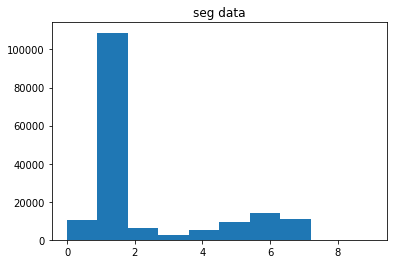

In [86]:
plt.hist(data_1_df['segmentation'])
plt.title("seg data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

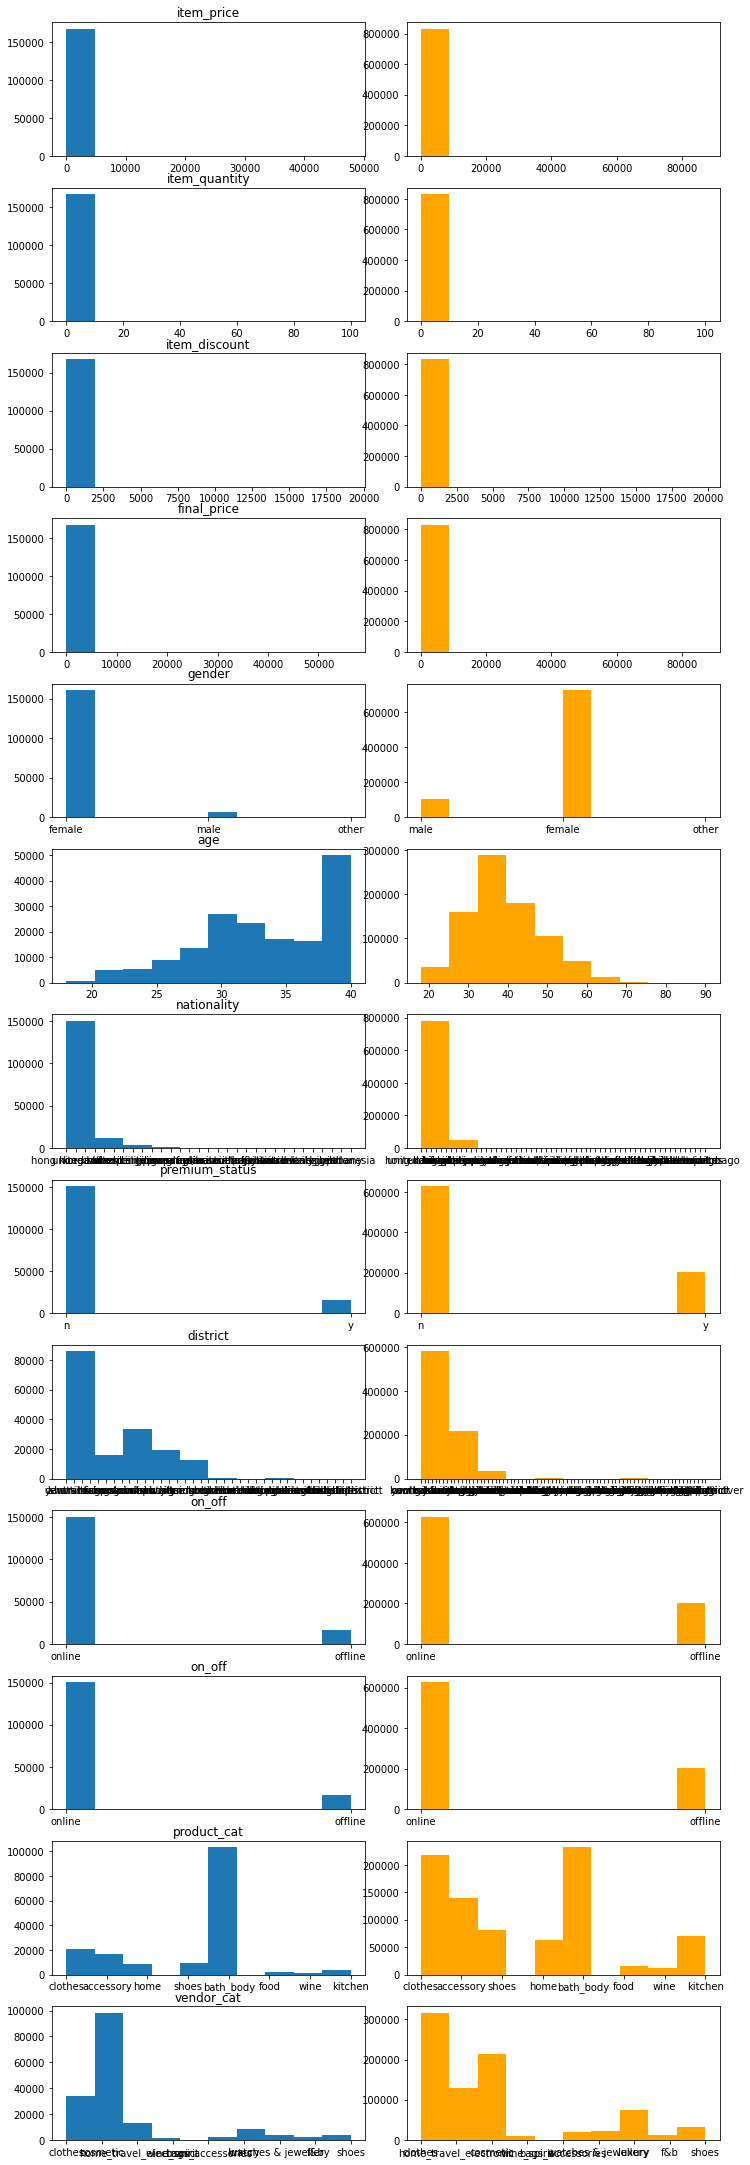

In [87]:
#define subplots
fig, ax = plt.subplots(13, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_1_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_1_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_1_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_1_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_1_df['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df['gender'],color='orange')

ax[5, 0].hist(data_1_df['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df['age'],color='orange')

ax[6, 0].hist(data_1_df['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df['nationality'],color='orange')

ax[7, 0].hist(data_1_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_1_df['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df['district'],color='orange')

ax[9, 0].hist(data_1_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_1_df['on_off'])
ax[10, 0].title.set_text('on_off')
ax[10, 1].hist(data_df['on_off'],color='orange')

ax[11, 0].hist(data_1_df['product_cat'])
ax[11, 0].title.set_text('product_cat')
ax[11, 1].hist(data_df['product_cat'],color='orange')

ax[12, 0].hist(data_1_df['vendor_cat'])
ax[12, 0].title.set_text('vendor_cat')
ax[12, 1].hist(data_df['vendor_cat'],color='orange')

plt.show

## Seg 2

In [88]:
seg_2_list = seg_2_df['customer_ID'].unique().tolist()

In [89]:
data_2_df = data_df[data_df['customer_ID'].isin(seg_2_list)]

<function matplotlib.pyplot.show(close=None, block=None)>

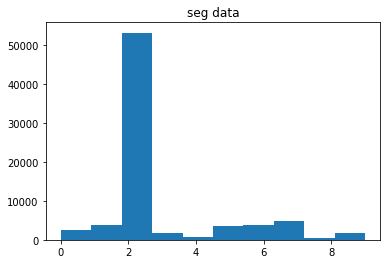

In [90]:
plt.hist(data_2_df['segmentation'])
plt.title("seg data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

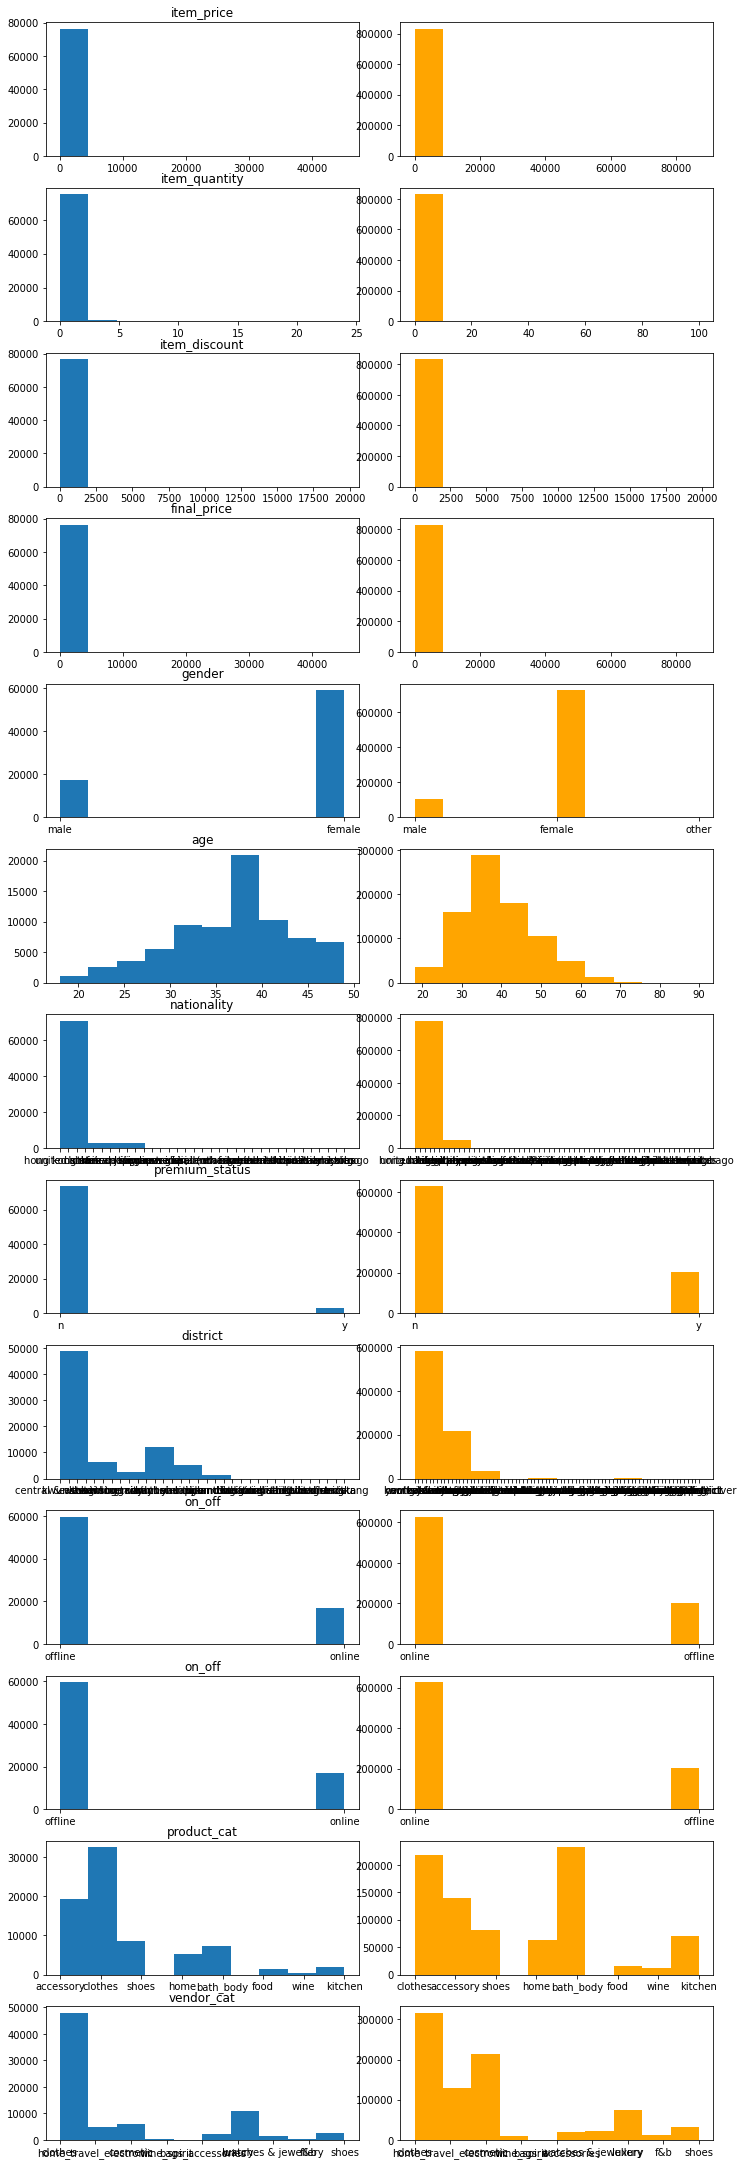

In [92]:
#define subplots
fig, ax = plt.subplots(13, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_2_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_2_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_2_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_2_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_2_df['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df['gender'],color='orange')

ax[5, 0].hist(data_2_df['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df['age'],color='orange')

ax[6, 0].hist(data_2_df['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df['nationality'],color='orange')

ax[7, 0].hist(data_2_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_2_df['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df['district'],color='orange')

ax[9, 0].hist(data_2_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_2_df['on_off'])
ax[10, 0].title.set_text('on_off')
ax[10, 1].hist(data_df['on_off'],color='orange')

ax[11, 0].hist(data_2_df['product_cat'])
ax[11, 0].title.set_text('product_cat')
ax[11, 1].hist(data_df['product_cat'],color='orange')

ax[12, 0].hist(data_2_df['vendor_cat'])
ax[12, 0].title.set_text('vendor_cat')
ax[12, 1].hist(data_df['vendor_cat'],color='orange')

plt.show

## Seg 3

In [96]:
seg_3_list = seg_3_df['customer_ID'].unique().tolist()

In [97]:
data_3_df = data_df[data_df['customer_ID'].isin(seg_3_list)]

<function matplotlib.pyplot.show(close=None, block=None)>

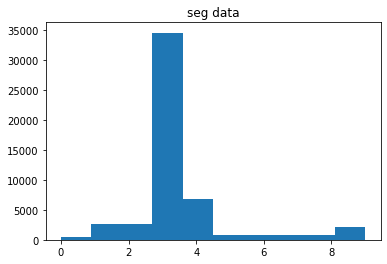

In [98]:
plt.hist(data_3_df['segmentation'])
plt.title("seg data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

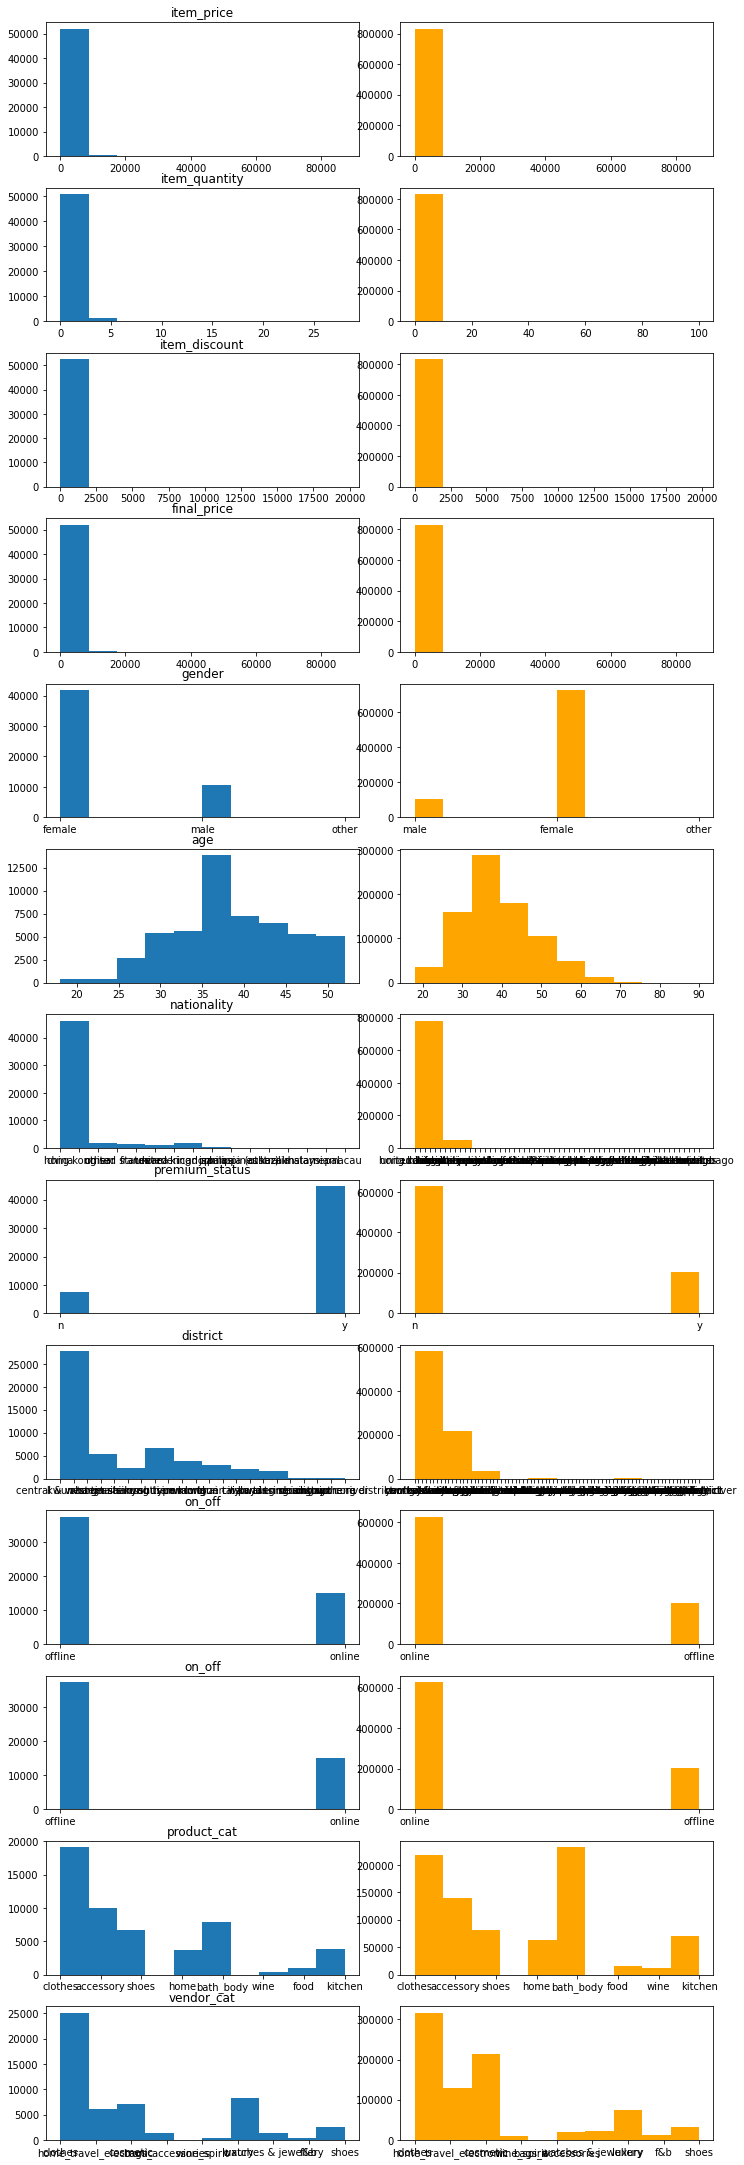

In [99]:
#define subplots
fig, ax = plt.subplots(13, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_3_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_3_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_3_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_3_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_3_df['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df['gender'],color='orange')

ax[5, 0].hist(data_3_df['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df['age'],color='orange')

ax[6, 0].hist(data_3_df['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df['nationality'],color='orange')

ax[7, 0].hist(data_3_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_3_df['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df['district'],color='orange')

ax[9, 0].hist(data_3_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_3_df['on_off'])
ax[10, 0].title.set_text('on_off')
ax[10, 1].hist(data_df['on_off'],color='orange')

ax[11, 0].hist(data_3_df['product_cat'])
ax[11, 0].title.set_text('product_cat')
ax[11, 1].hist(data_df['product_cat'],color='orange')

ax[12, 0].hist(data_3_df['vendor_cat'])
ax[12, 0].title.set_text('vendor_cat')
ax[12, 1].hist(data_df['vendor_cat'],color='orange')

plt.show

## Seg 4

In [100]:
seg_4_list = seg_4_df['customer_ID'].unique().tolist()

In [101]:
data_4_df = data_df[data_df['customer_ID'].isin(seg_4_list)]

<function matplotlib.pyplot.show(close=None, block=None)>

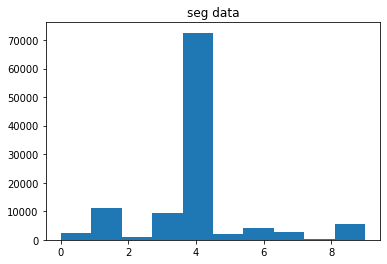

In [102]:
plt.hist(data_4_df['segmentation'])
plt.title("seg data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

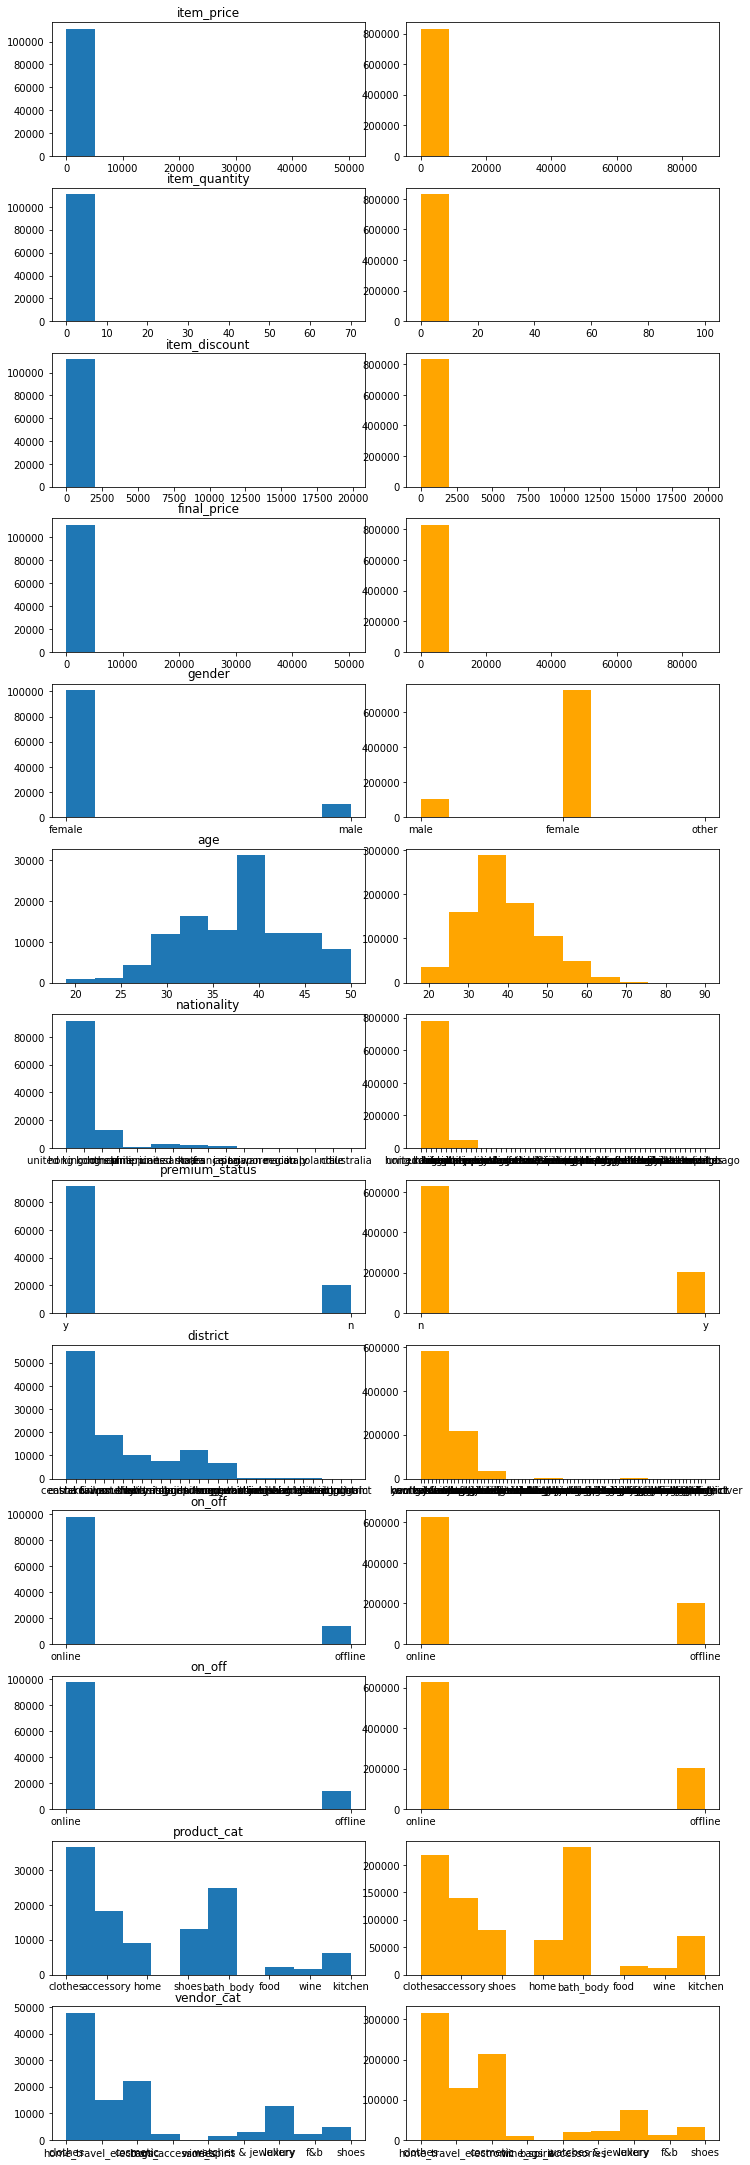

In [104]:
#define subplots
fig, ax = plt.subplots(13, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_4_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_4_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_4_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_4_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_4_df['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df['gender'],color='orange')

ax[5, 0].hist(data_4_df['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df['age'],color='orange')

ax[6, 0].hist(data_4_df['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df['nationality'],color='orange')

ax[7, 0].hist(data_4_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_4_df['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df['district'],color='orange')

ax[9, 0].hist(data_4_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_4_df['on_off'])
ax[10, 0].title.set_text('on_off')
ax[10, 1].hist(data_df['on_off'],color='orange')

ax[11, 0].hist(data_4_df['product_cat'])
ax[11, 0].title.set_text('product_cat')
ax[11, 1].hist(data_df['product_cat'],color='orange')

ax[12, 0].hist(data_4_df['vendor_cat'])
ax[12, 0].title.set_text('vendor_cat')
ax[12, 1].hist(data_df['vendor_cat'],color='orange')

plt.show

## Seg 5

In [105]:
seg_5_list = seg_5_df['customer_ID'].unique().tolist()

In [106]:
data_5_df = data_df[data_df['customer_ID'].isin(seg_5_list)]

<function matplotlib.pyplot.show(close=None, block=None)>

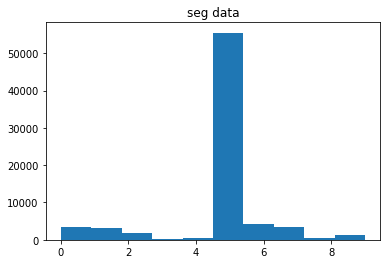

In [107]:
plt.hist(data_5_df['segmentation'])
plt.title("seg data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

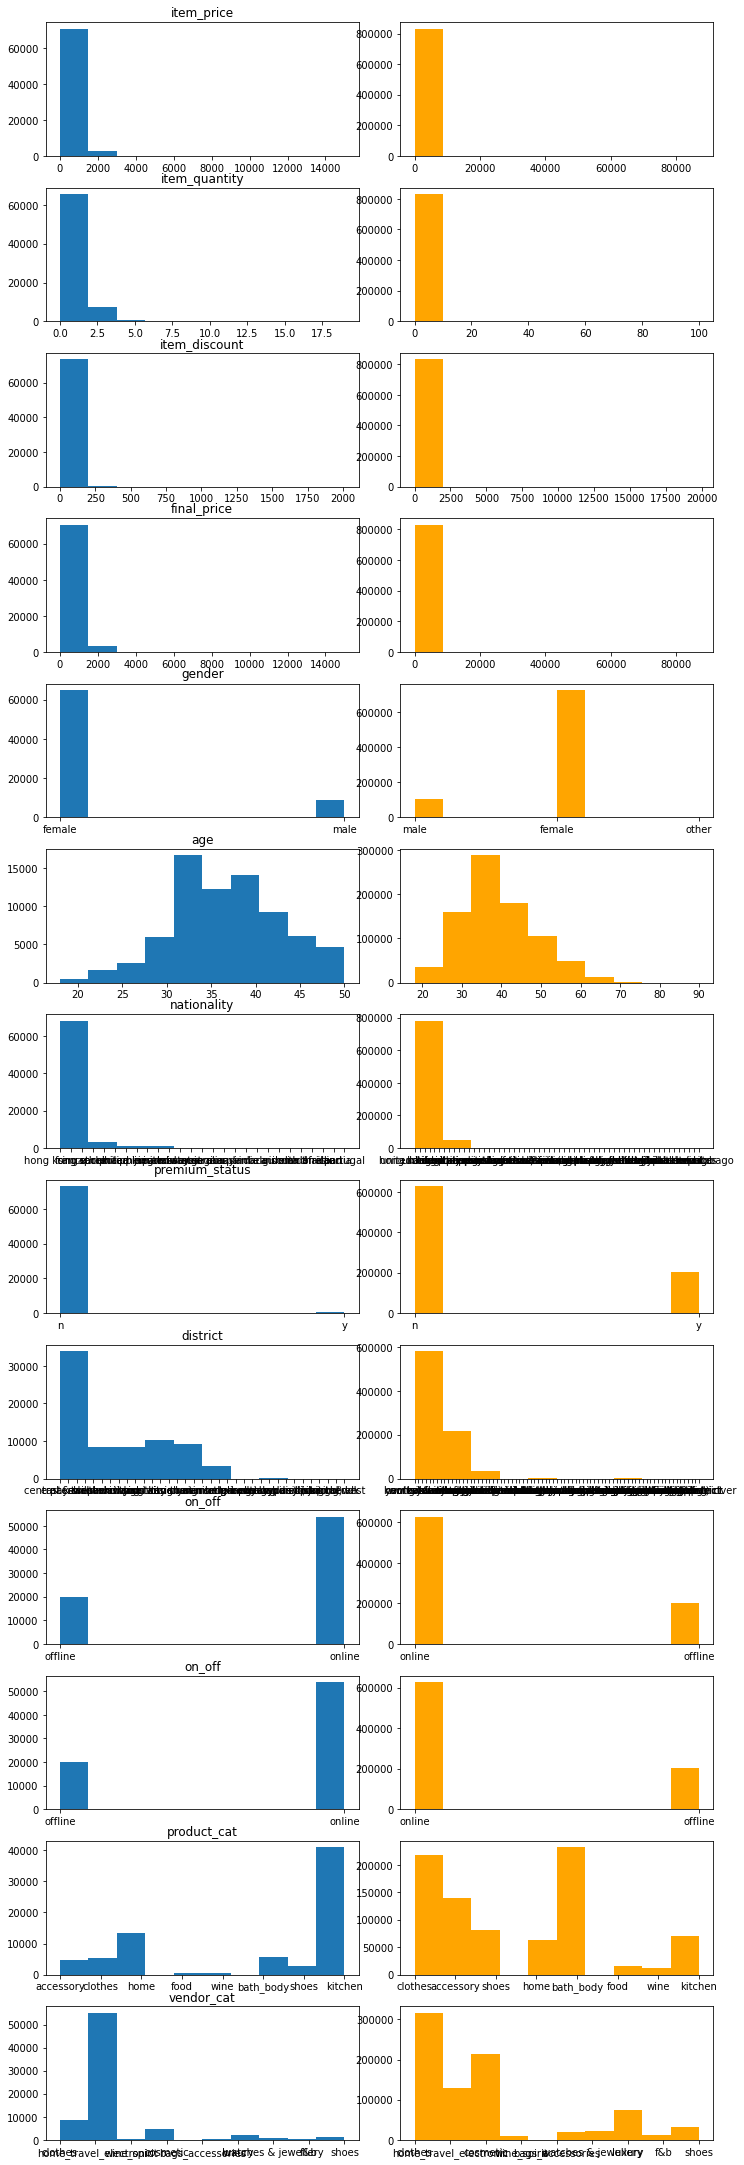

In [108]:
#define subplots
fig, ax = plt.subplots(13, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_5_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_5_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_5_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_5_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_5_df['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df['gender'],color='orange')

ax[5, 0].hist(data_5_df['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df['age'],color='orange')

ax[6, 0].hist(data_5_df['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df['nationality'],color='orange')

ax[7, 0].hist(data_5_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_5_df['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df['district'],color='orange')

ax[9, 0].hist(data_5_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_5_df['on_off'])
ax[10, 0].title.set_text('on_off')
ax[10, 1].hist(data_df['on_off'],color='orange')

ax[11, 0].hist(data_5_df['product_cat'])
ax[11, 0].title.set_text('product_cat')
ax[11, 1].hist(data_df['product_cat'],color='orange')

ax[12, 0].hist(data_5_df['vendor_cat'])
ax[12, 0].title.set_text('vendor_cat')
ax[12, 1].hist(data_df['vendor_cat'],color='orange')

plt.show

## Seg 6

In [109]:
seg_6_list = seg_6_df['customer_ID'].unique().tolist()

In [110]:
data_6_df = data_df[data_df['customer_ID'].isin(seg_6_list)]

<function matplotlib.pyplot.show(close=None, block=None)>

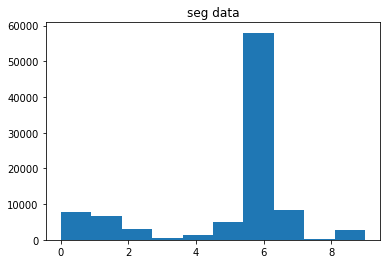

In [111]:
plt.hist(data_6_df['segmentation'])
plt.title("seg data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

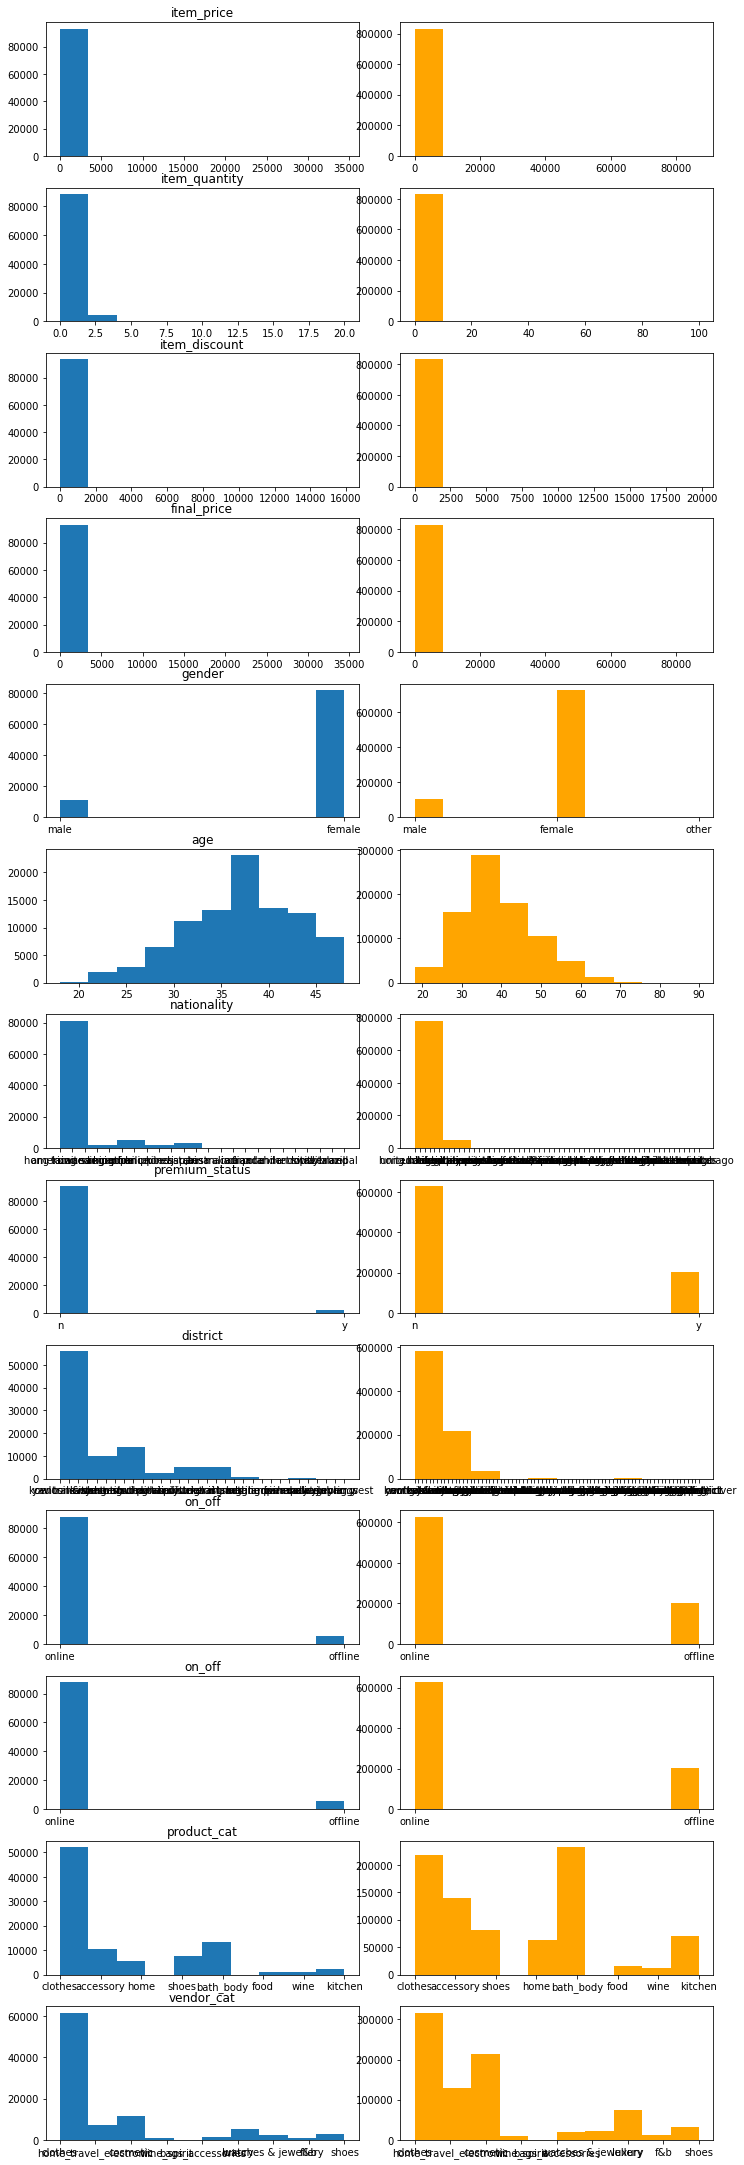

In [112]:
#define subplots
fig, ax = plt.subplots(13, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_6_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_6_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_6_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_6_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_6_df['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df['gender'],color='orange')

ax[5, 0].hist(data_6_df['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df['age'],color='orange')

ax[6, 0].hist(data_6_df['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df['nationality'],color='orange')

ax[7, 0].hist(data_6_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_6_df['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df['district'],color='orange')

ax[9, 0].hist(data_6_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_6_df['on_off'])
ax[10, 0].title.set_text('on_off')
ax[10, 1].hist(data_df['on_off'],color='orange')

ax[11, 0].hist(data_6_df['product_cat'])
ax[11, 0].title.set_text('product_cat')
ax[11, 1].hist(data_df['product_cat'],color='orange')

ax[12, 0].hist(data_6_df['vendor_cat'])
ax[12, 0].title.set_text('vendor_cat')
ax[12, 1].hist(data_df['vendor_cat'],color='orange')

plt.show

## Seg 7

In [113]:
seg_7_list = seg_7_df['customer_ID'].unique().tolist()

In [114]:
data_7_df = data_df[data_df['customer_ID'].isin(seg_7_list)]

<function matplotlib.pyplot.show(close=None, block=None)>

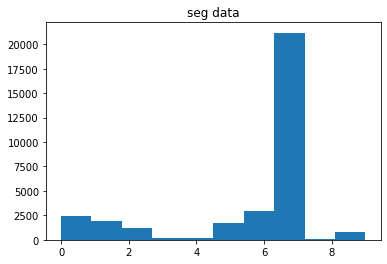

In [118]:
plt.hist(data_7_df['segmentation'],bins=10)
plt.title("seg data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

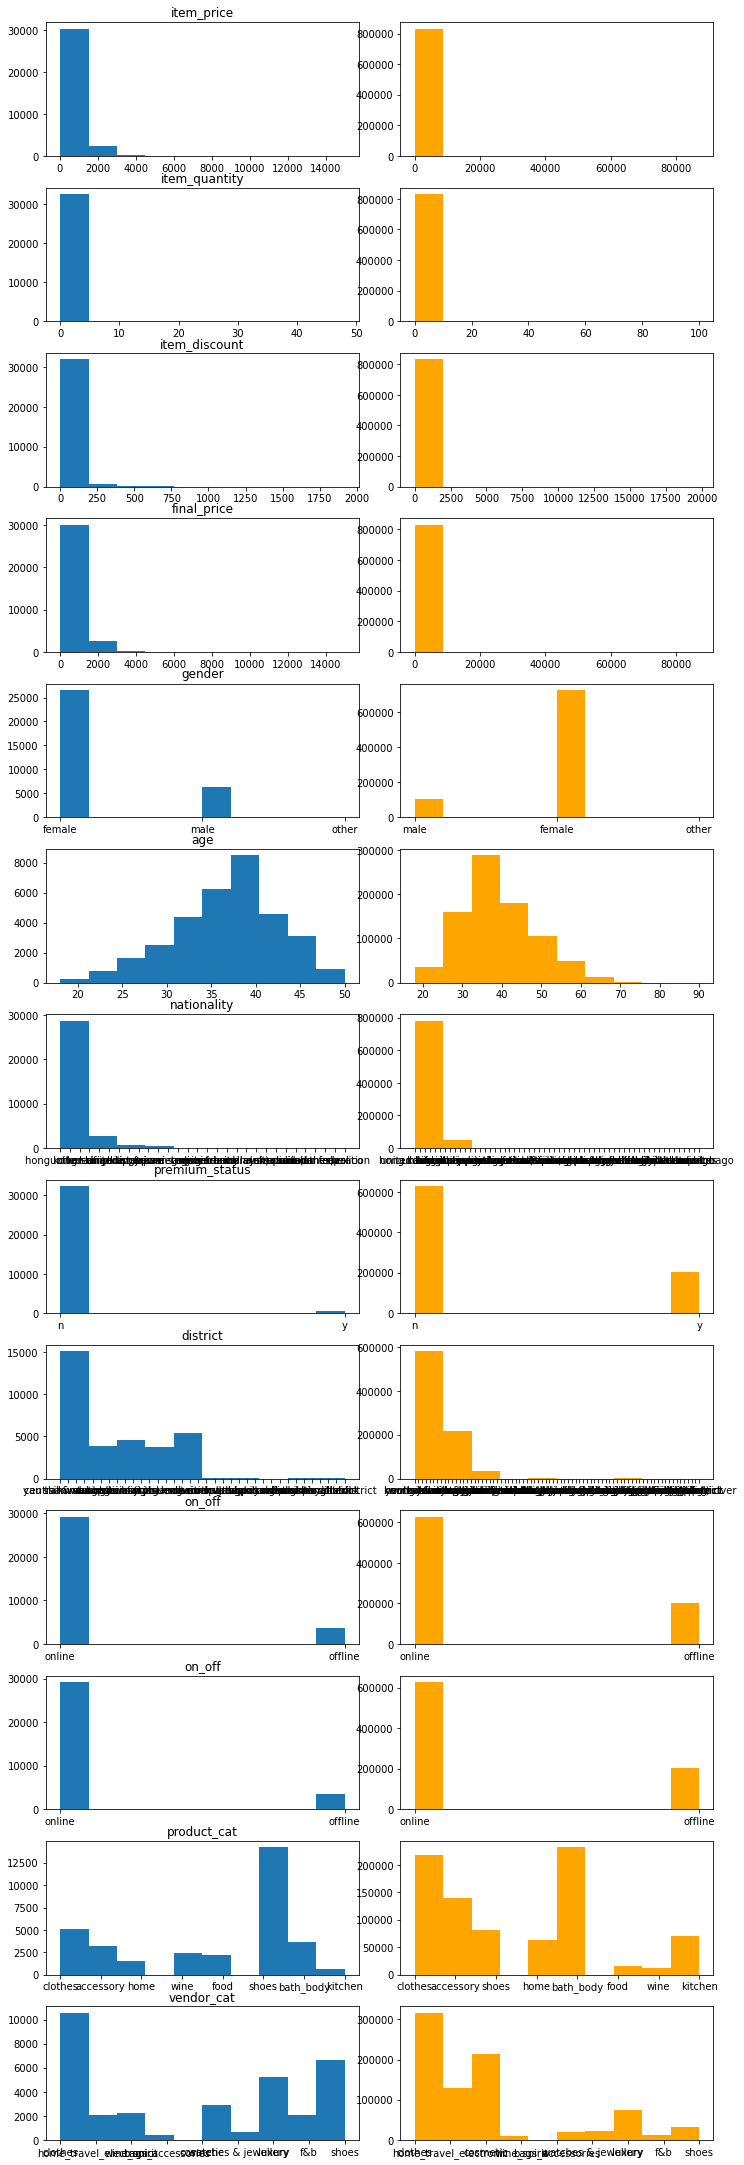

In [117]:
#define subplots
fig, ax = plt.subplots(13, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_7_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_7_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_7_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_7_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_7_df['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df['gender'],color='orange')

ax[5, 0].hist(data_7_df['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df['age'],color='orange')

ax[6, 0].hist(data_7_df['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df['nationality'],color='orange')

ax[7, 0].hist(data_7_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_7_df['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df['district'],color='orange')

ax[9, 0].hist(data_7_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_7_df['on_off'])
ax[10, 0].title.set_text('on_off')
ax[10, 1].hist(data_df['on_off'],color='orange')

ax[11, 0].hist(data_7_df['product_cat'])
ax[11, 0].title.set_text('product_cat')
ax[11, 1].hist(data_df['product_cat'],color='orange')

ax[12, 0].hist(data_7_df['vendor_cat'])
ax[12, 0].title.set_text('vendor_cat')
ax[12, 1].hist(data_df['vendor_cat'],color='orange')

plt.show

## Seg 8

In [119]:
seg_8_list = seg_8_df['customer_ID'].unique().tolist()

In [120]:
data_8_df = data_df[data_df['customer_ID'].isin(seg_8_list)]

<function matplotlib.pyplot.show(close=None, block=None)>

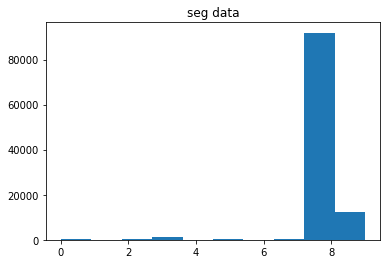

In [121]:
plt.hist(data_8_df['segmentation'])
plt.title("seg data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

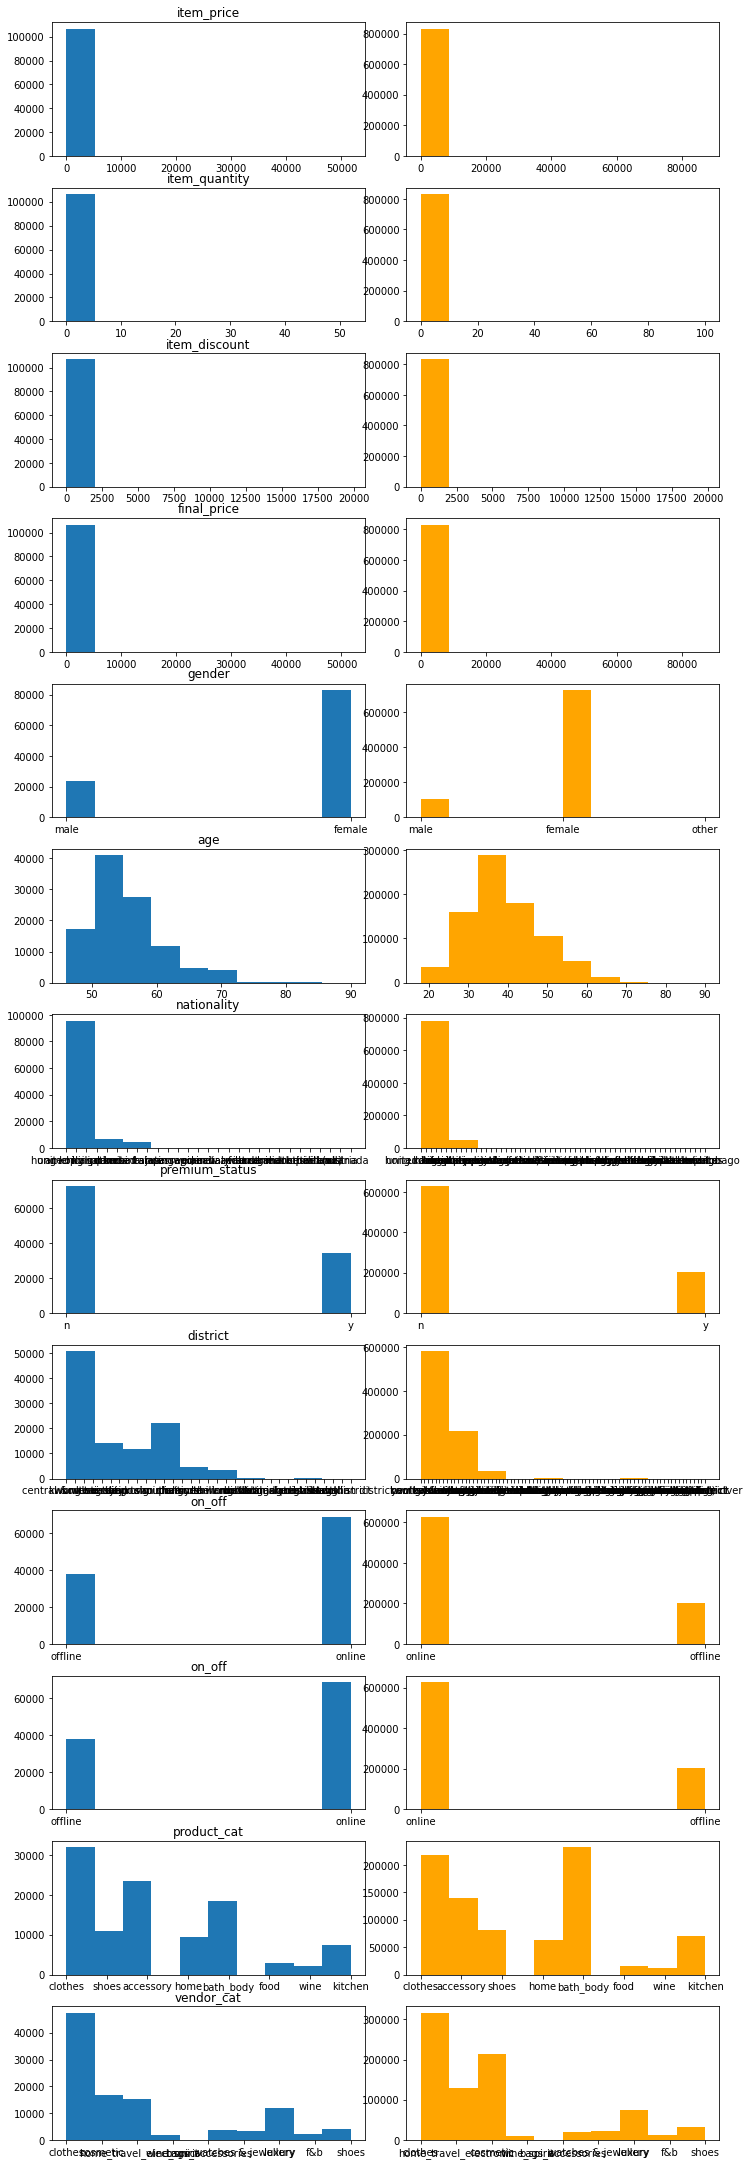

In [122]:
#define subplots
fig, ax = plt.subplots(13, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_8_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_8_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_8_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_8_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_8_df['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df['gender'],color='orange')

ax[5, 0].hist(data_8_df['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df['age'],color='orange')

ax[6, 0].hist(data_8_df['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df['nationality'],color='orange')

ax[7, 0].hist(data_8_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_8_df['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df['district'],color='orange')

ax[9, 0].hist(data_8_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_8_df['on_off'])
ax[10, 0].title.set_text('on_off')
ax[10, 1].hist(data_df['on_off'],color='orange')

ax[11, 0].hist(data_8_df['product_cat'])
ax[11, 0].title.set_text('product_cat')
ax[11, 1].hist(data_df['product_cat'],color='orange')

ax[12, 0].hist(data_8_df['vendor_cat'])
ax[12, 0].title.set_text('vendor_cat')
ax[12, 1].hist(data_df['vendor_cat'],color='orange')

plt.show

## Seg 9

In [123]:
seg_9_list = seg_9_df['customer_ID'].unique().tolist()

In [124]:
data_9_df = data_df[data_df['customer_ID'].isin(seg_9_list)]

<function matplotlib.pyplot.show(close=None, block=None)>

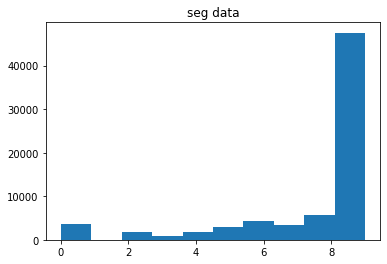

In [125]:
plt.hist(data_9_df['segmentation'])
plt.title("seg data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

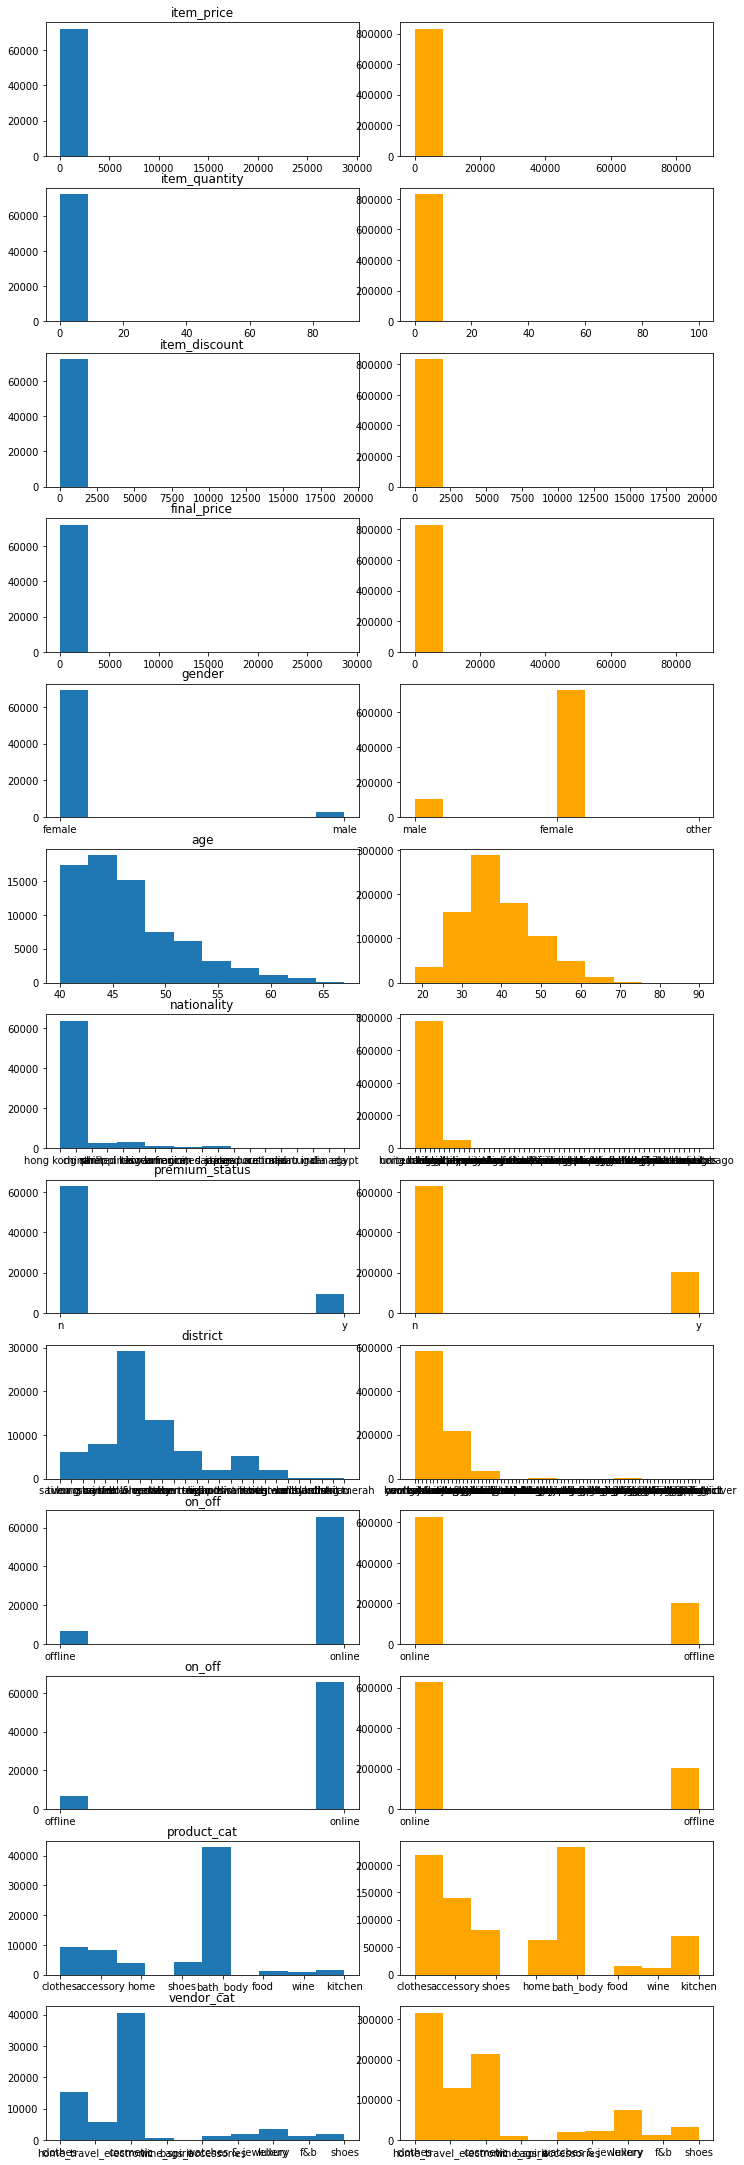

In [126]:
#define subplots
fig, ax = plt.subplots(13, 2, figsize=(10,30))
fig.tight_layout()

#create subplots
ax[0, 0].hist(data_9_df['item_price'])
ax[0, 0].title.set_text('item_price')
ax[0, 1].hist(data_df['item_price'],color='orange')

ax[1, 0].hist(data_9_df['item_quantity'])
ax[1, 0].title.set_text('item_quantity')
ax[1, 1].hist(data_df['item_quantity'],color='orange')

ax[2, 0].hist(data_9_df['item_discount'])
ax[2, 0].title.set_text('item_discount')
ax[2, 1].hist(data_df['item_discount'],color='orange')

ax[3, 0].hist(data_9_df['final_price'])
ax[3, 0].title.set_text('final_price')
ax[3, 1].hist(data_df['final_price'],color='orange')

ax[4, 0].hist(data_9_df['gender'])
ax[4, 0].title.set_text('gender')
ax[4, 1].hist(data_df['gender'],color='orange')

ax[5, 0].hist(data_9_df['age'])
ax[5, 0].title.set_text('age')
ax[5, 1].hist(data_df['age'],color='orange')

ax[6, 0].hist(data_9_df['nationality'])
ax[6, 0].title.set_text('nationality')
ax[6, 1].hist(data_df['nationality'],color='orange')

ax[7, 0].hist(data_9_df['premium_status'])
ax[7, 0].title.set_text('premium_status')
ax[7, 1].hist(data_df['premium_status'],color='orange')

ax[8, 0].hist(data_9_df['district'])
ax[8, 0].title.set_text('district')
ax[8, 1].hist(data_df['district'],color='orange')

ax[9, 0].hist(data_9_df['on_off'])
ax[9, 0].title.set_text('on_off')
ax[9, 1].hist(data_df['on_off'],color='orange')

ax[10, 0].hist(data_9_df['on_off'])
ax[10, 0].title.set_text('on_off')
ax[10, 1].hist(data_df['on_off'],color='orange')

ax[11, 0].hist(data_9_df['product_cat'])
ax[11, 0].title.set_text('product_cat')
ax[11, 1].hist(data_df['product_cat'],color='orange')

ax[12, 0].hist(data_9_df['vendor_cat'])
ax[12, 0].title.set_text('vendor_cat')
ax[12, 1].hist(data_df['vendor_cat'],color='orange')

plt.show